<a href="https://colab.research.google.com/github/naufalhawari/gemastik-data-minik-esteh/blob/main/esteh_juara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Environment dan Membuat Dataset

## Mengunduh Library yang Dibutuhkan

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.4 MB/s eta 0:00:00


In [2]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.8 MB/s eta 0:00:00


In [3]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.6 MB/s eta 0:00:00


## Import Libraries

In [4]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max.columns", 50)

## Mendapatkan Dan Praproses Dataset

In [5]:
# File path yang berisi dataset yang telah dilakukan labeling dalam format file .csv
file_path = "https://raw.githubusercontent.com/naufalhawari/gemastik-data-minik-esteh/main/esteh-df.csv"


In [6]:
# Import kelas StemmerFactory untuk melakukan ekstraksi kata dasar (stemming) pada teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


peta_perbaikan = {
    " ga ": " tidak ",
    " engga ": " tidak ",
    " ngga ": " tidak ",
    " nggak ": " tidak ",
    " gak ": " tidak ",
    "ngak": " tidak ",
    " tdk ": " tidak ",
    " g ": " tidak ",
    "pdhl": " padahal ",
    "adlh": " adalah ",
    "cuman": " hanya ",
    " cuma ": " hanya ",
    " tapi ": " tetapi ",
    " tp ": " tetapi ",
    "bngt": " banget ",
    "hny": " hanya ",
    "spt": " seperti ",
    "sprt": " seperti ",
    "apk": " aplikasi ",
    "jgn": " jangan ",
    " jg ": " juga ",
    "trs": " terus ",
    "utk": " untuk ",
    " sampe ": " sampai ",
    " ampe ": " sampai ",
    " d ": " ",
    " n ": " ",
    " bs ": " bisa ",
    " k ": " ",
    " e ": " ",
    "tlg": " tolong ",
    " sm ": " sama ",
    "matursuwun": " terima kasih ",
    "msh": " masih ",
    " jd ": " jadi ",
    " dlu ": " ",
    "dahulu": " ",
    " yg ": " ",
    "apk": " aplikasi ",
    "apps": " aplikasi ",
    " app ": " aplikasi ",
    " tuk ": " ",
    "untk": " ",
    "utk": " ",
    "org": " orang ",
    "cpt": " cepat ",
    "cepet": " cepat ",
    "sempet": " sempat ",
    "mksd": " maksud ",
    "maksd": " maksud ",
    "mksud": " maksud ",
    "mantaf": " mantap ",
    " udah ": " ",
    "sudah": " ",
    " suda ": " ",
    " dah ": " ",
    " dh ": " ",
    " da ": " ",
    " ud ": " ",
    " sudh ": "",
    "trims": " terima kasih ",
    "makasih": " terima kasih ",
    "ngaco": " kacau ",
    " dr ": "",
    "resiko": " risiko ",
    "klw": "kalau",
    "kalo": "kalau",
    " klo ": "kalau",
    ",": " , ",
    "-": " - ",
    ".": " . ",
    "/": " / ",
    "error": " eror ",
    " erro ": " eror ",
    "knp": " kenapa ",
    "knapa": " kenapa ",
    " gmn ": " bagaimana ",
    "bgmn": " bagaimana ",
    " ko ": " kok ",
    "koq": " kok ",
    "sgt": " ",
    "sangat": "",
    "blm": " belum ",
    "belom": " belum ",
    "sbg": " ",
    "sebagai": "",
    "jgn": " jangan ",
    "bwt": " ",
    "buat": " ",
    "skli": " sekali ",
    "tetep": " tetap ",
    "bth": " butuh ",
    " gada ": " tidak ada ",
    "dgn": " ",
    "rspn": " respon ",
    " ati ": " hati ",
    "pls": " tolong ",
    "please": " tolong ",
    "plis": " tolong ",
    "sring": " sering ",
    "kluar": " keluar ",
    " adm ": " admin ",
    "tsb": " ",
    "tersebut": " ",
    " mau ": " ",
    " nya ": " ",
    " terus ": " ",
    " trus ": " ",
    " sama ": " ",
    " apa ": " ",
    " sangat ": " ",
    " banget ": " ",
    " jarang ": " ",
    " sering ": " ",
    " min ": " ",
    " gimana ": " ",
    " mana ": " ",
    " di ": " ",
    " sdh ": " ",
    " gk ": " ",
    " atas ": " ",
    " aja ": " ",
    " saja ": " ",
    " udh ": " ",
    " bgt ": " ",
    " lg ": " ",
    " lagi ": " ",
    " lalu ": " ",
    " sy ": " ",
    " saya ": " ",
    " aplikasi ": " ",
}

# Standarisasi Penulisan Kata dan Penghapusan Kata-Kata yang Sering Ditemukan di Semua Label Klasifikasi
def correcting_and_remove_unused_words(teks: pd.Series):
  for key, value in peta_perbaikan.items():
    teks = teks.str.replace(key, value)
  return teks


# Mendefinisikan fungsi untuk ekstraksi kata dasar (stemming) pada teks
def remove_stop_word_and_stemming(teks):
  stemmerFactory = StemmerFactory().create_stemmer()
  stopWordRemoverFactory = StopWordRemoverFactory().create_stop_word_remover()

  hasil = stemmerFactory.stem(teks)
  hasil = stopWordRemoverFactory.remove(teks)

  return hasil


# Mendefinisikan fungsi untuk pembuatan dan pengolahan dataset
def create_dataset(file_path, sheet_names = None) :

  # Membaca file .csv dari URL
  dataset = pd.read_csv(file_path)

  dataset = dataset.copy().dropna() # Membuang data yang memiliki nilai kosong pada minimal satu kolom

  # Kritik bernilai satu jika teks ulasan berupa keluhan atau saran
  # dataset["kritik"] = dataset[["keluhan", "saran"]].max(axis = 1)

  # Membuang kolom saran dan keluhan
  # dataset = dataset.drop(["saran", "keluhan"], axis = 1)

  dataset["ulasan"] = dataset["ulasan"].str.lower() # Semua karakter pada teks ulasan diubah menjadi huruf kecil
  dataset["ulasan"] = " " + dataset["ulasan"] + " "
  dataset["ulasan"] = correcting_and_remove_unused_words(dataset["ulasan"]) # Menghapus Kesalahan Penulisan
  dataset["ulasan"] = dataset["ulasan"].apply(lambda x: remove_stop_word_and_stemming(x)) # Melakukan ekstraksi kata dasar (stemming) pada dataset teks ulasan

  dataset = dataset.loc[~dataset.duplicated()].copy() # Menghapus data duplikasi

  return dataset

In [7]:
# Inisiasi dataset baru
# df = create_dataset(file_path)

# Impor dataset yang sudah terlebih dahulu diproses
df = pd.read_csv(file_path)

# Impor dataset yang sudah terpisah sebelumnya menjadi himpunan data latih dan data uji (pemisahan data dapat dilihat di bagian pemisahan data)
train = pd.read_csv("https://raw.githubusercontent.com/naufalhawari/gemastik-data-minik-esteh/main/esteh-train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/naufalhawari/gemastik-data-minik-esteh/main/esteh-test.csv")

In [8]:
# Eksplorasi beberapa data

df.head()
# train.head()

,ulasan,apresiasi,kritik
0,bagus lapor kritik soal jak wifi ribet aks...,1,1
1,menu jaki vaksin sih minggu gabiza akses men...,0,1
2,hello jaki lapor jakarta aman eror bantu j...,0,1
3,enak pake jakikalaumau lapor tinggal foto la...,1,0
4,pernah daftar dadak kalau tebet ecopark misa...,0,1


In [9]:
# Menyimpan dataset yang telah diproses terlebih dahulu

# df.to_csv("esteh-df.csv", index = False)

In [10]:
# Memeriksa kembali data duplikasi

df.duplicated().sum()
# train.duplicated().sum(), test.duplicated().sum()

0

In [11]:
# Memeriksa adanya missing values

df.isnull().sum()
# train.isnull().sum(), test.isnull().sum()

ulasan       0
apresiasi    0
kritik       0
dtype: int64

In [12]:
# Memeriksa distribusi banyaknya data latih dan data uji

print("Banyak Keseluruhan Dataset: ", len(df))
print("Banyak Data Latih: ", len(train))
print("Banyak Data Uji: ", len(test))

Banyak Keseluruhan Dataset:  1675
Banyak Data Latih:  1348
Banyak Data Uji:  335


## Pemisahan Data

In [13]:
# Melakukan pemisahan data baru

# from sklearn.model_selection import train_test_split

# X = df.ulasan
# y = df.drop("ulasan", axis = 1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = df.apresiasi)

# Memisahkan data menjadi train set dan test set untuk disimpan ke sebuah file csv
# train = y_train.copy()
# test = y_test.copy()

# train["ulasan"] = X_train
# test["ulasan"] = X_test


In [14]:
# Menyimpan data yang telah terpisah

# train.to_csv("esteh-train.csv", index = False)
# test.to_csv("esteh-test.csv", index = False)

In [15]:
# Split X and y pada data train dan test set

X_train = train["ulasan"]
X_test = test["ulasan"]
y_train = train.drop("ulasan", axis = 1)
y_test = test.drop("ulasan", axis = 1)

# Explorasi Dan Analisis Data

In [16]:
from wordcloud import WordCloud

kritik_review_texts = " ".join(list(df[df.kritik == 1]["ulasan"]))

apresiasi_review_texts = " ".join(list(df[df.apresiasi == 1]["ulasan"]))

wordcloud_apresiasi = WordCloud(
    width = 1280,
    height = 720,
    background_color = "white",
).generate(apresiasi_review_texts)

wordcloud_kritik = WordCloud(
    width = 1280,
    height = 720,
    background_color = "white",
).generate(kritik_review_texts)

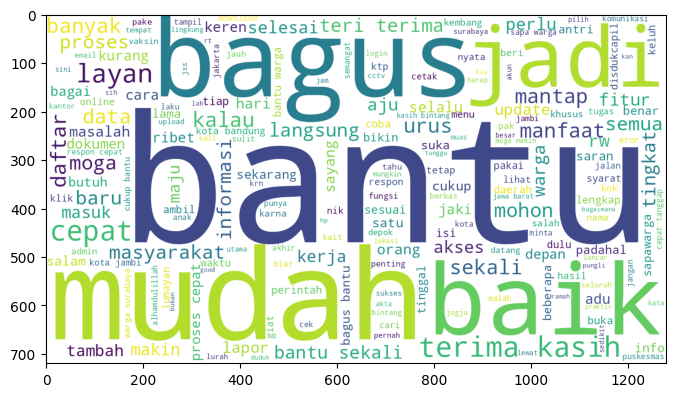

In [17]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud_apresiasi)

plt.show();

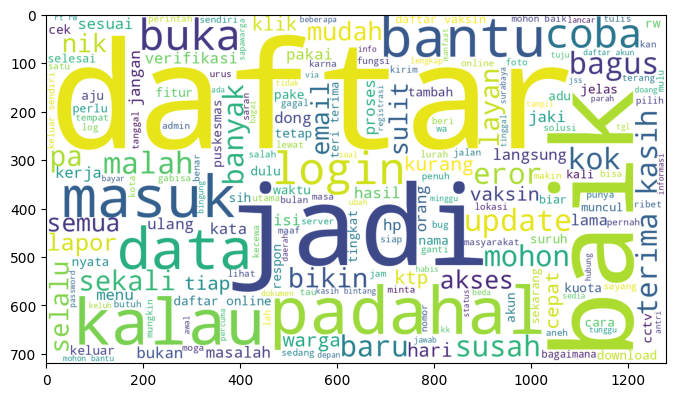

In [18]:
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud_kritik)

plt.show();

# RNN Model

## Inisiasi Tokenizer RNN

In [19]:
VOCAB_SIZE = 1200
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(X_train)

In [20]:
len(encoder.get_vocabulary())

1200

## Membangun Arsitektur Model

In [37]:
# Membuat arsitektur model RNN meliputi LSTM, stacked LSTM, Bi-LSTM, stacked Bi-LSTM, GRU, stacked GRU, Bi-GRU, dan stacked Bi-GRU

lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

bi_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

stacked_bi_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

bi_gru= tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

stacked_bi_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

In [38]:
stacked_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.LSTM(64, return_sequences = True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

stacked_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(), dtype = "string"),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=100,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.GRU(64, return_sequences = True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

## Model Compiling

In [39]:
# Melakukan compile pada seluruh arsitektur yang telah dibuat

lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

stacked_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

bi_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)



stacked_bi_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)



gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


bi_gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


stacked_bi_gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


In [40]:
stacked_lstm.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

stacked_gru.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)


## Model Training

In [41]:
early_stopper = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [42]:
lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper],
)

Epoch 1/35
85/85 [==============================] - 17s 132ms/step - loss: 0.6893 - binary_accuracy: 0.6495 - val_loss: 0.6856 - val_binary_accuracy: 0.7075
Epoch 2/35
85/85 [==============================] - 7s 80ms/step - loss: 0.6803 - binary_accuracy: 0.6947 - val_loss: 0.6741 - val_binary_accuracy: 0.6910
Epoch 3/35
85/85 [==============================] - 3s 37ms/step - loss: 0.6608 - binary_accuracy: 0.6925 - val_loss: 0.6443 - val_binary_accuracy: 0.6896
Epoch 4/35
85/85 [==============================] - 2s 27ms/step - loss: 0.5920 - binary_accuracy: 0.6929 - val_loss: 0.5707 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 2s 21ms/step - loss: 0.5476 - binary_accuracy: 0.6932 - val_loss: 0.5528 - val_binary_accuracy: 0.6896
Epoch 6/35
85/85 [==============================] - 1s 16ms/step - loss: 0.5333 - binary_accuracy: 0.6984 - val_loss: 0.5404 - val_binary_accuracy: 0.6985
Epoch 7/35
85/85 [==============================] - 1s 17ms/step - l

In [43]:
stacked_lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 22s 161ms/step - loss: 0.6913 - binary_accuracy: 0.6369 - val_loss: 0.6886 - val_binary_accuracy: 0.6896
Epoch 2/35
85/85 [==============================] - 6s 76ms/step - loss: 0.6829 - binary_accuracy: 0.6925 - val_loss: 0.6745 - val_binary_accuracy: 0.6896
Epoch 3/35
85/85 [==============================] - 3s 41ms/step - loss: 0.6343 - binary_accuracy: 0.6925 - val_loss: 0.5956 - val_binary_accuracy: 0.6896
Epoch 4/35
85/85 [==============================] - 2s 27ms/step - loss: 0.5614 - binary_accuracy: 0.6925 - val_loss: 0.5617 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 3s 33ms/step - loss: 0.5435 - binary_accuracy: 0.6929 - val_loss: 0.5468 - val_binary_accuracy: 0.6896
Epoch 6/35
85/85 [==============================] - 4s 45ms/step - loss: 0.5236 - binary_accuracy: 0.7036 - val_loss: 0.5300 - val_binary_accuracy: 0.6925
Epoch 7/35
85/85 [==============================] - 3s 34ms/step - l

In [44]:
bi_lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 24s 172ms/step - loss: 0.6917 - binary_accuracy: 0.5534 - val_loss: 0.6893 - val_binary_accuracy: 0.5836
Epoch 2/35
85/85 [==============================] - 4s 50ms/step - loss: 0.6855 - binary_accuracy: 0.6536 - val_loss: 0.6820 - val_binary_accuracy: 0.6582
Epoch 3/35
85/85 [==============================] - 4s 40ms/step - loss: 0.6750 - binary_accuracy: 0.6881 - val_loss: 0.6694 - val_binary_accuracy: 0.7358
Epoch 4/35
85/85 [==============================] - 4s 47ms/step - loss: 0.6522 - binary_accuracy: 0.7059 - val_loss: 0.6355 - val_binary_accuracy: 0.7209
Epoch 5/35
85/85 [==============================] - 3s 36ms/step - loss: 0.5911 - binary_accuracy: 0.6944 - val_loss: 0.5799 - val_binary_accuracy: 0.7090
Epoch 6/35
85/85 [==============================] - 2s 26ms/step - loss: 0.5542 - binary_accuracy: 0.7018 - val_loss: 0.5574 - val_binary_accuracy: 0.7164
Epoch 7/35
85/85 [==============================] - 2s 26ms/step - l

In [45]:
stacked_bi_lstm.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 35s 185ms/step - loss: 0.6881 - binary_accuracy: 0.6780 - val_loss: 0.6825 - val_binary_accuracy: 0.6896
Epoch 2/35
85/85 [==============================] - 5s 65ms/step - loss: 0.6674 - binary_accuracy: 0.6925 - val_loss: 0.6495 - val_binary_accuracy: 0.6896
Epoch 3/35
85/85 [==============================] - 5s 61ms/step - loss: 0.6005 - binary_accuracy: 0.6925 - val_loss: 0.5718 - val_binary_accuracy: 0.6896
Epoch 4/35
85/85 [==============================] - 5s 61ms/step - loss: 0.5484 - binary_accuracy: 0.6925 - val_loss: 0.5492 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 4s 44ms/step - loss: 0.5202 - binary_accuracy: 0.6929 - val_loss: 0.5270 - val_binary_accuracy: 0.6896
Epoch 6/35
85/85 [==============================] - 3s 34ms/step - loss: 0.4938 - binary_accuracy: 0.7070 - val_loss: 0.4943 - val_binary_accuracy: 0.7030
Epoch 7/35
85/85 [==============================] - 4s 42ms/step - l

In [46]:
gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 16s 131ms/step - loss: 0.6927 - binary_accuracy: 0.5297 - val_loss: 0.6908 - val_binary_accuracy: 0.6104
Epoch 2/35
85/85 [==============================] - 5s 60ms/step - loss: 0.6878 - binary_accuracy: 0.6651 - val_loss: 0.6853 - val_binary_accuracy: 0.6925
Epoch 3/35
85/85 [==============================] - 5s 57ms/step - loss: 0.6812 - binary_accuracy: 0.6895 - val_loss: 0.6777 - val_binary_accuracy: 0.6910
Epoch 4/35
85/85 [==============================] - 3s 30ms/step - loss: 0.6721 - binary_accuracy: 0.6951 - val_loss: 0.6667 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 2s 22ms/step - loss: 0.6573 - binary_accuracy: 0.6921 - val_loss: 0.6481 - val_binary_accuracy: 0.6896
Epoch 6/35
85/85 [==============================] - 2s 19ms/step - loss: 0.6271 - binary_accuracy: 0.6929 - val_loss: 0.6051 - val_binary_accuracy: 0.6896
Epoch 7/35
85/85 [==============================] - 2s 19ms/step - l

In [47]:
stacked_gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 23s 160ms/step - loss: 0.6911 - binary_accuracy: 0.5994 - val_loss: 0.6880 - val_binary_accuracy: 0.6552
Epoch 2/35
85/85 [==============================] - 7s 84ms/step - loss: 0.6832 - binary_accuracy: 0.6832 - val_loss: 0.6786 - val_binary_accuracy: 0.6925
Epoch 3/35
85/85 [==============================] - 3s 36ms/step - loss: 0.6714 - binary_accuracy: 0.6821 - val_loss: 0.6635 - val_binary_accuracy: 0.6896
Epoch 4/35
85/85 [==============================] - 3s 36ms/step - loss: 0.6490 - binary_accuracy: 0.6843 - val_loss: 0.6333 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 2s 23ms/step - loss: 0.6061 - binary_accuracy: 0.6881 - val_loss: 0.5803 - val_binary_accuracy: 0.6896
Epoch 6/35
85/85 [==============================] - 4s 42ms/step - loss: 0.5607 - binary_accuracy: 0.6925 - val_loss: 0.5482 - val_binary_accuracy: 0.6896
Epoch 7/35
85/85 [==============================] - 3s 33ms/step - l

In [48]:
bi_gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 22s 147ms/step - loss: 0.6943 - binary_accuracy: 0.4562 - val_loss: 0.6908 - val_binary_accuracy: 0.6254
Epoch 2/35
85/85 [==============================] - 6s 71ms/step - loss: 0.6875 - binary_accuracy: 0.6799 - val_loss: 0.6837 - val_binary_accuracy: 0.6985
Epoch 3/35
85/85 [==============================] - 3s 31ms/step - loss: 0.6796 - binary_accuracy: 0.6984 - val_loss: 0.6751 - val_binary_accuracy: 0.6910
Epoch 4/35
85/85 [==============================] - 3s 34ms/step - loss: 0.6691 - binary_accuracy: 0.6962 - val_loss: 0.6636 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 3s 39ms/step - loss: 0.6552 - binary_accuracy: 0.6932 - val_loss: 0.6476 - val_binary_accuracy: 0.6896
Epoch 6/35
85/85 [==============================] - 3s 35ms/step - loss: 0.6341 - binary_accuracy: 0.6947 - val_loss: 0.6217 - val_binary_accuracy: 0.6896
Epoch 7/35
85/85 [==============================] - 2s 22ms/step - l

In [49]:
stacked_bi_gru.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 35,
    callbacks = [early_stopper]
)

Epoch 1/35
85/85 [==============================] - 34s 180ms/step - loss: 0.6855 - binary_accuracy: 0.6795 - val_loss: 0.6765 - val_binary_accuracy: 0.6896
Epoch 2/35
85/85 [==============================] - 7s 77ms/step - loss: 0.6658 - binary_accuracy: 0.6925 - val_loss: 0.6512 - val_binary_accuracy: 0.6896
Epoch 3/35
85/85 [==============================] - 5s 61ms/step - loss: 0.6309 - binary_accuracy: 0.6925 - val_loss: 0.6083 - val_binary_accuracy: 0.6896
Epoch 4/35
85/85 [==============================] - 5s 54ms/step - loss: 0.5861 - binary_accuracy: 0.6925 - val_loss: 0.5635 - val_binary_accuracy: 0.6896
Epoch 5/35
85/85 [==============================] - 3s 37ms/step - loss: 0.5478 - binary_accuracy: 0.6925 - val_loss: 0.5338 - val_binary_accuracy: 0.6910
Epoch 6/35
85/85 [==============================] - 3s 31ms/step - loss: 0.5113 - binary_accuracy: 0.6992 - val_loss: 0.4997 - val_binary_accuracy: 0.6985
Epoch 7/35
85/85 [==============================] - 3s 31ms/step - l

## Evaluasi Model

In [50]:
from sklearn.metrics import classification_report

# Label kelas target untuk penamaan pada tabel classification report
class_labels = ["apresiasi", "kritik"]

In [51]:
# Evaluasi LSTM
y_pred = lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

   apresiasi       0.87      0.85      0.86       121
      kritik       0.96      0.89      0.92       248

   micro avg       0.93      0.88      0.90       369
   macro avg       0.92      0.87      0.89       369
weighted avg       0.93      0.88      0.90       369
 samples avg       0.94      0.91      0.92       369



In [52]:
# Evaluasi Stacked LSTM

y_pred = stacked_lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

   apresiasi       0.87      0.91      0.89       121
      kritik       0.97      0.86      0.91       248

   micro avg       0.94      0.88      0.91       369
   macro avg       0.92      0.89      0.90       369
weighted avg       0.94      0.88      0.91       369
 samples avg       0.94      0.91      0.92       369



In [53]:
# Evaluasi Bi-LSTM

y_pred = bi_lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

   apresiasi       0.83      0.95      0.88       121
      kritik       0.97      0.94      0.95       248

   micro avg       0.92      0.94      0.93       369
   macro avg       0.90      0.94      0.92       369
weighted avg       0.92      0.94      0.93       369
 samples avg       0.94      0.95      0.94       369



In [54]:
# Evaluasi Stacked Bi-LSTM

y_pred = stacked_bi_lstm.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 5s 9ms/step
              precision    recall  f1-score   support

   apresiasi       0.85      0.93      0.89       121
      kritik       0.98      0.93      0.95       248

   micro avg       0.93      0.93      0.93       369
   macro avg       0.91      0.93      0.92       369
weighted avg       0.94      0.93      0.93       369
 samples avg       0.95      0.94      0.94       369



In [55]:
# Evaluasi GRU

y_pred = gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

   apresiasi       0.83      0.85      0.84       121
      kritik       0.97      0.88      0.92       248

   micro avg       0.92      0.87      0.90       369
   macro avg       0.90      0.87      0.88       369
weighted avg       0.92      0.87      0.90       369
 samples avg       0.93      0.90      0.91       369



In [56]:
# Evaluasi Stacked GRU

y_pred = stacked_gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

   apresiasi       0.81      0.89      0.85       121
      kritik       0.97      0.90      0.94       248

   micro avg       0.91      0.90      0.91       369
   macro avg       0.89      0.90      0.89       369
weighted avg       0.92      0.90      0.91       369
 samples avg       0.93      0.92      0.92       369



In [57]:
# Evaluasi Bi-GRU

y_pred = bi_gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

   apresiasi       0.85      0.89      0.87       121
      kritik       0.97      0.95      0.96       248

   micro avg       0.93      0.93      0.93       369
   macro avg       0.91      0.92      0.92       369
weighted avg       0.93      0.93      0.93       369
 samples avg       0.95      0.95      0.94       369



In [58]:
# Evaluasi Stacked Bi-GRU

y_pred = stacked_bi_gru.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 6s 8ms/step
              precision    recall  f1-score   support

   apresiasi       0.87      0.90      0.88       121
      kritik       0.98      0.94      0.96       248

   micro avg       0.94      0.93      0.93       369
   macro avg       0.92      0.92      0.92       369
weighted avg       0.94      0.93      0.93       369
 samples avg       0.96      0.95      0.95       369



## Menyimpan Model

In [ ]:
# Menyimpan model ke directory

# lstm.save("lstm-1")
# bi_lstm.save("bi-lstm-1")
# stacked_bi_lstm.save("stacked-bi-lstm-1")
# gru.save("gru-1")
# bi_gru.save("bi-gru-1")
# stacked_bi_gru.save("stacked-bi-gru-1")

# BERT Model

## Mapping BERT Preprocesser and Encoder

In [16]:
# Map kata kunci untuk menuju URL dependencies BERT preprocesser dan BERT encoder

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

## Membangun Arsitektur Model

In [17]:
# Mendefinisikan fungsi untuk membuat model large BERT, small BERT, Electra, dan Albert

def build_bert_model(bert_model_name: str):
  tfhub_handle_encoder = map_name_to_handle[bert_model_name]
  tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

  text_input = tf.keras.layers.Input(shape=(), dtype="string")
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(2, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [18]:
# Membuat IndoBERT architecture

from transformers import AutoTokenizer,  TFAutoModelForSequenceClassification
indobert_tokenizer = AutoTokenizer.from_pretrained("indolem/indobert-base-uncased")
indobert_fine_tune_model = TFAutoModelForSequenceClassification.from_pretrained("indolem/indobert-base-uncased",
                                                                                from_pt=True,
                                                                                num_labels = 2,
                                                                                problem_type = "multi-label-classification")

# Tokenize dataset using IndoBERT tokenizer
X_train_indobert = indobert_tokenizer(list(X_train), return_tensors = "np", padding = True)
X_train_indobert = dict(X_train_indobert)

X_test_indobert = indobert_tokenizer(list(X_test), return_tensors = "np", padding = True)
X_test_indobert = dict(X_test_indobert)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
# Membuat model BERT selain IndoBERT

bert_uncased_model = build_bert_model('bert_en_uncased_L-12_H-768_A-12')
small_bert_model = build_bert_model('small_bert/bert_en_uncased_L-4_H-512_A-8')
albert_model = build_bert_model('albert_en_base')
electra_model = build_bert_model('electra_base')

## Model Compiling

In [20]:
indobert_fine_tune_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

In [21]:
bert_uncased_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

small_bert_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

albert_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

electra_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00003),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = tf.keras.metrics.BinaryAccuracy(),
)

## Model Training

In [22]:
indobert_fine_tune_model.fit(
    x = X_train_indobert,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test_indobert, y_test),
    epochs = 3
)

Epoch 1/3
85/85 [==============================] - 99s 521ms/step - loss: 0.9784 - binary_accuracy: 0.5872 - val_loss: 0.6042 - val_binary_accuracy: 0.6657
Epoch 2/3
85/85 [==============================] - 34s 400ms/step - loss: 0.5920 - binary_accuracy: 0.7166 - val_loss: 0.5245 - val_binary_accuracy: 0.7194
Epoch 3/3
85/85 [==============================] - 33s 393ms/step - loss: 0.5411 - binary_accuracy: 0.7585 - val_loss: 0.5532 - val_binary_accuracy: 0.7418


In [23]:
bert_uncased_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3
)


Epoch 1/3
85/85 [==============================] - 99s 597ms/step - loss: 0.4748 - binary_accuracy: 0.7778 - val_loss: 0.3815 - val_binary_accuracy: 0.8388
Epoch 2/3
85/85 [==============================] - 47s 550ms/step - loss: 0.3373 - binary_accuracy: 0.8613 - val_loss: 0.3076 - val_binary_accuracy: 0.8701
Epoch 3/3
85/85 [==============================] - 43s 511ms/step - loss: 0.2284 - binary_accuracy: 0.9110 - val_loss: 0.2567 - val_binary_accuracy: 0.9030


In [24]:
small_bert_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3
)

Epoch 1/3
85/85 [==============================] - 40s 265ms/step - loss: 0.5335 - binary_accuracy: 0.7392 - val_loss: 0.4775 - val_binary_accuracy: 0.7582
Epoch 2/3
85/85 [==============================] - 18s 211ms/step - loss: 0.3730 - binary_accuracy: 0.8446 - val_loss: 0.3225 - val_binary_accuracy: 0.8627
Epoch 3/3
85/85 [==============================] - 16s 183ms/step - loss: 0.2879 - binary_accuracy: 0.8772 - val_loss: 0.2816 - val_binary_accuracy: 0.8821


In [25]:
albert_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3
)

Epoch 1/3
85/85 [==============================] - 70s 611ms/step - loss: 0.5808 - binary_accuracy: 0.7111 - val_loss: 0.4717 - val_binary_accuracy: 0.7881
Epoch 2/3
85/85 [==============================] - 52s 614ms/step - loss: 0.5413 - binary_accuracy: 0.7348 - val_loss: 0.5228 - val_binary_accuracy: 0.7597
Epoch 3/3
85/85 [==============================] - 51s 597ms/step - loss: 0.4720 - binary_accuracy: 0.7949 - val_loss: 0.5260 - val_binary_accuracy: 0.7582


In [26]:
electra_model.fit(
    x = X_train,
    y = y_train,
    batch_size = 16,
    validation_data = (X_test, y_test),
    epochs = 3
)

Epoch 1/3
85/85 [==============================] - 95s 555ms/step - loss: 0.5360 - binary_accuracy: 0.7374 - val_loss: 0.3465 - val_binary_accuracy: 0.8612
Epoch 2/3
85/85 [==============================] - 43s 509ms/step - loss: 0.3657 - binary_accuracy: 0.8513 - val_loss: 0.3039 - val_binary_accuracy: 0.8731
Epoch 3/3
85/85 [==============================] - 45s 526ms/step - loss: 0.2577 - binary_accuracy: 0.8958 - val_loss: 0.2589 - val_binary_accuracy: 0.8940


## Evaluasi Model

In [27]:
from sklearn.metrics import classification_report

class_labels = ["apresiasi", "kritik"]

In [28]:
# Evaluasi Model IndoBERT

y_pred = indobert_fine_tune_model.predict(X_test_indobert)["logits"] > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 5s 185ms/step
              precision    recall  f1-score   support

   apresiasi       0.59      0.65      0.62       121
      kritik       0.79      0.95      0.86       248

   micro avg       0.73      0.85      0.78       369
   macro avg       0.69      0.80      0.74       369
weighted avg       0.72      0.85      0.78       369
 samples avg       0.76      0.87      0.79       369



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Evaluasi Model Large BERT

y_pred = bert_uncased_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 5s 360ms/step
              precision    recall  f1-score   support

   apresiasi       0.85      0.87      0.86       121
      kritik       0.96      0.92      0.94       248

   micro avg       0.92      0.90      0.91       369
   macro avg       0.90      0.89      0.90       369
weighted avg       0.92      0.90      0.91       369
 samples avg       0.93      0.92      0.92       369



In [30]:
# Evaluasi Model Small BERT

y_pred = small_bert_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 2s 112ms/step
              precision    recall  f1-score   support

   apresiasi       0.83      0.86      0.84       121
      kritik       0.94      0.90      0.92       248

   micro avg       0.90      0.89      0.89       369
   macro avg       0.88      0.88      0.88       369
weighted avg       0.90      0.89      0.89       369
 samples avg       0.91      0.91      0.90       369



In [31]:
# Evaluasi Model Albert

y_pred = albert_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 4s 319ms/step
              precision    recall  f1-score   support

   apresiasi       0.63      0.75      0.68       121
      kritik       0.91      0.76      0.83       248

   micro avg       0.79      0.76      0.77       369
   macro avg       0.77      0.76      0.76       369
weighted avg       0.82      0.76      0.78       369
 samples avg       0.77      0.77      0.76       369



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Evaluasi Model Electra

y_pred = electra_model.predict(X_test) > 0.5
print(classification_report(y_test, y_pred, target_names=class_labels))

11/11 [==============================] - 4s 317ms/step
              precision    recall  f1-score   support

   apresiasi       0.78      0.95      0.86       121
      kritik       0.96      0.91      0.93       248

   micro avg       0.89      0.92      0.91       369
   macro avg       0.87      0.93      0.89       369
weighted avg       0.90      0.92      0.91       369
 samples avg       0.92      0.94      0.92       369



## Save Model

In [33]:
# Menyimpan model ke directory

# bert_uncased_model.save("bert-1")
# small_bert_model.save("small-bert-1")
# albert_model.save("albert-1")
# electra_model.save("electra-1")